In [75]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
from scipy.spatial import distance
import PIL.Image as pilimg
from IPython.display import Image
import PIL

In [4]:
def getMaxMin(shape):
    mmax = -1000
    mmin = 1000
    for i in range(len(shape)):
        max = -1000
        min = 1000
        for j in range(len(shape[i])):
            if max < shape[i][j]:
                max = shape[i][j]
            if min > shape[i][j]:
                min = shape[i][j]
        if mmax < max:
            mmax = max
        if mmin > min:
            mmin = min
    return mmax, mmin

In [5]:
circle = np.load("circle_output.npy")
square = np.load("square_output.npy")
triangle = np.load("triangle_output.npy")
horizontal = np.load("horizontal_output.npy")
vertical = np.load("vertical_output.npy")
diagonal = np.load("diagonal_output.npy")

In [6]:
print("circle",getMaxMin(circle))
print("square",getMaxMin(square))
print("triangle",getMaxMin(triangle))
print("horizontal",getMaxMin(horizontal))
print("vertical",getMaxMin(vertical))
print("diagonal",getMaxMin(diagonal))

circle (17.225454, 0.0)
square (20.849072, 0.0)
triangle (17.632359, 0.0)
horizontal (14.679194, 0.0)
vertical (14.865683, 0.0)
diagonal (11.988074, 0.0)


In [7]:
rand_index = rd.randint(0, 50)


In [10]:
one = np.vstack([circle, square])

In [11]:
two = np.vstack([triangle, horizontal])

In [12]:
thr = np.vstack([vertical, diagonal])

In [13]:
total = np.vstack([one, two])

In [14]:
total = np.vstack([total, thr])

In [15]:
circle_dist = []
square_dist = []
triangle_dist = []
hor_dist = []
ver_dist = []
dia_dist = []

for line in total:
    circle_dist.append(distance.euclidean(circle[rand_index], line))
    square_dist.append(distance.euclidean(square[rand_index], line))
    triangle_dist.append(distance.euclidean(triangle[rand_index], line))
    hor_dist.append(distance.euclidean(horizontal[rand_index], line))
    ver_dist.append(distance.euclidean(vertical[rand_index], line))
    dia_dist.append(distance.euclidean(diagonal[rand_index], line))
    

In [71]:
#width 985, 28 + 5, sep - 30
# height 325, 28 + 5 sep - 10
'''
result = Image.new("L", (985, 325))
img = Image.open(images[0])
result.paste(im=img, box(0, 0))
result.save("./2nd_result/circle.png")
'''

SyntaxError: positional argument follows keyword argument (<ipython-input-71-754def8099c1>, line 6)

In [77]:
def getCompareImages(shape, orderd_shape_dst):
    
    path = './dataset/tests/'
    images = []
    for i in range(len(orderd_shape_dst)):
        images.append(path + total_filename[orderd_shape_dst[i]] + ".png")

    names = []
    unit = 30
    for i in range(0, 10):
        imgs = [PIL.Image.open(i) for i in images[i*unit:unit*(i+1)]]
        min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
        imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
        imgs_comb = PIL.Image.fromarray(imgs_comb)
        filename = "./2nd_result/test_"+ shape + str(i) + ".jpg"
        names.append(filename)
        imgs_comb.save(filename)

    imgs = [PIL.Image.open(i) for i in names]
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save( './2nd_result/' + shape+ '.jpg' )

    display(Image(path+total_filename[orderd_shape_dst[0]]+".png"))
    display(Image('./2nd_result/'+shape+'.jpg' ))

In [80]:
ordered_circle_dist = np.array(circle_dist).argsort()
ordered_circle_dist

array([ 26,  18,  45,  19,  29,  47,  40,  16,  17,  22,  12,  14,   4,
        31,  27,  23,  35,  11,   0,   6,  39,  49,  13,   1,   9,  10,
        38,   8,  42,  20,  21,  41,  46,  37,   7,  44,  68,  86,  96,
        33,  24, 125,  76,  55, 101,  65,  79,  60,  63,  92,  83,  51,
        36,  85,  99,  98,   2,  57,  81,  48,  84,  67,  58,  89,  95,
        43,  91,  50,  66,  59,  64,  62,  88,  75,  90,  97,  32,  93,
        70, 134,  56,  78,  53,  87,  69,  61, 240,  73,  80,  77,   3,
       267,  82,  54,   5,  25, 215,  74, 222,  71, 149,  72,  30, 250,
        15, 143, 268, 135,  52, 116, 115,  94, 102, 217, 118,  28, 242,
       140, 235, 243, 238, 265, 139, 137, 255, 292, 133, 241, 210, 237,
       145, 227, 144, 206, 122, 285, 201, 221, 131, 104, 110, 278, 161,
       256, 276, 253, 273, 147, 164, 205, 245, 225, 264, 207, 120, 229,
       106, 103, 247, 290, 294, 212, 213, 223, 246, 249, 200, 296, 160,
       234, 232, 295,  34, 219, 169, 114, 287, 202, 179, 289, 18

In [82]:
ordered_square_dist = np.array(square_dist).argsort()
ordered_square_dist

array([ 76,  65,  91,  58,  68,  85,  63,  95,  64,  86,  99,  81,  66,
        59,  90,  84,  92,  56,  75,  87,  51,  98,  61,  50,  53,  97,
        67,  89,  93,  96,  70,  57,  55,  83,  88,  60,  54,  72,  82,
        77,  62,  69,  73,  80,  10,  94,  71,  19,  78,   0,  45,  29,
        52,  26,  79,  16,  11,   9,  18,  49,  74,  21,  23,  35,  40,
        14,  22,  31,  13,   4,  47,  38,  17,   6,  12,  39,  41,  33,
       125,   7,   1,  27,  37,  20,  46, 240, 101,  44,   2, 267, 222,
       210,  42,   8,  36,  32,  43,  48, 217,  24,   5,  30, 215, 265,
       149, 238,  25, 219,  15, 133, 134,  28, 221, 276, 243, 268, 235,
       237, 264, 122, 256, 160, 207, 278, 115, 200, 292, 284, 201, 245,
       164, 241, 247, 285, 250, 229,  34, 287, 289, 205, 179, 294, 144,
       249, 275, 295, 297, 143, 116, 255, 262, 161, 147, 212, 266, 227,
       261, 110, 170, 197, 270, 273, 171, 139, 181, 169, 272, 118, 131,
       293, 290, 159, 230, 242, 135, 140, 198, 206, 120, 223, 18

In [83]:
ordered_triangle_dist = np.array(triangle_dist).argsort()
ordered_triangle_dist

array([126, 103, 120, 108, 116, 139, 117, 104, 119, 138, 146, 130, 142,
       143, 153, 195, 148, 111, 113, 163, 137, 181, 186, 140, 178, 162,
       123, 176, 190, 100, 175, 191, 161, 174, 177, 127, 189, 131, 144,
       150, 165, 110, 147, 132, 124, 158, 187, 196, 193, 114, 115, 156,
       290, 155, 157, 173, 107,  28, 167, 180, 152, 172, 136, 194, 182,
       151, 169, 168, 133, 122, 134, 135, 141,  25, 145, 185, 149, 125,
       118, 171, 102, 199, 128, 101, 192, 106, 164,   2,  79,  43, 197,
       166,   5, 160, 188, 159, 109, 265, 198, 184, 121,  15, 183, 179,
       154, 170,  30, 297, 284, 112, 266,  36,  48, 289, 129,  34,  32,
       287, 254,  24, 105, 281, 270, 257, 299, 275, 256, 277, 255, 262,
        60, 293, 258, 267,  44, 272,  20, 285,  21, 251, 261, 268, 264,
       253, 273, 291, 294, 296, 263, 283,  14, 288,  49, 240,  42, 221,
       274, 295,  51, 238,  89, 278, 292, 259, 271,  19, 235, 298,  55,
        41, 269,  16,  18, 280, 286, 237, 252, 243,  40,  38, 22

In [84]:
ordered_hor_dist = np.array(hor_dist).argsort()
ordered_hor_dist

array([176, 190, 196, 195, 186, 193, 165, 153, 175, 172, 187, 150, 158,
       152, 173, 191, 180, 162, 174, 177, 155, 151, 178, 138, 117, 157,
       142, 185, 163, 156, 194, 189, 167, 192, 181, 161, 168, 182, 199,
       171, 169, 166, 126, 120, 139, 147, 123, 197, 144, 184, 114, 104,
       188, 159, 110, 133, 183, 131, 122, 164, 198,  28, 290, 103, 160,
       116, 146, 170, 140, 179, 132, 127, 115, 107, 143, 297, 130,  25,
       149, 108, 154, 100,  34, 119, 266,   5, 124, 111, 287,  30,  15,
       254, 148, 118, 145, 137, 284, 265, 257, 289, 270, 101, 256, 113,
       102, 275, 262,   2,  43, 135, 109, 125, 299, 136, 261, 134, 128,
       264,  79, 277,  36, 293, 272, 106, 281, 291,  32, 141, 258, 288,
        48, 255, 251, 273, 294, 221, 267, 238, 296, 283, 263, 285, 278,
       253, 295, 268, 286,  24, 269, 274, 276, 240, 235, 247, 237, 243,
       292, 280, 121, 217, 222, 271, 259, 205, 200, 298, 112, 260, 201,
        60, 282, 212, 252, 215, 241, 105, 249, 207, 245, 129, 21

In [85]:
ordered_ver_dist = np.array(ver_dist).argsort()
ordered_ver_dist

array([226, 216, 239, 218, 233, 236, 223, 248, 220, 209, 206, 219, 230,
       229, 224, 246, 214, 211, 232, 210, 225, 228, 202, 245, 249, 227,
       207, 203, 234, 215, 231, 213, 244, 217, 200, 242, 241, 243, 222,
       212, 201, 205, 240, 250, 235, 247, 204, 276, 237, 221, 238, 208,
       292, 267,  55, 278, 268, 295,   3, 264, 256, 294,  96,  73,  92,
        74,  68,  99,  30, 273,  65,  64,  84,  78,  32,  36,  10, 285,
        85,  37,  62, 255, 274,  50,  83,   0, 296,  86,   9,  51,  56,
       261,  58,  61,  95,  87,  63,  76,  90,  57,  24,  42,  48,  98,
        52, 253,  13,  91, 272,  67, 287,  39,  97,  38,  80,  69,  93,
        81,  82,  21, 291,  75, 262,  26,  66, 275,  41,   5,  34,  49,
         2,  29, 293,  60, 280,  70,  15,  59,  16,  53,  89,  43,   4,
       270,  17, 286,  71,  54,  33,  45,  77, 283, 149,  46,  25,  14,
        23,  31, 259, 263, 125, 277,  79, 288,   7,  11, 257,  94,  35,
        12,   6, 266,  88, 279, 269, 258, 289, 281, 260, 282,  7

In [86]:
ordered_dia_dist = np.array(dia_dist).argsort()
ordered_dia_dist

array([276, 247, 207, 264, 245, 221, 237, 200, 243, 256, 241, 278, 205,
       217, 249, 212, 261, 294, 238, 235, 229, 201, 267, 222, 295, 230,
       262, 275, 287, 292, 210, 215, 270, 272,  34, 273,  30, 291, 240,
       227, 266, 255, 297, 296, 257, 293, 285, 268,   5, 274, 223, 220,
       164, 202, 254, 289, 198, 170, 179, 213, 160, 288, 286, 253,  15,
        32, 224, 159, 183, 250, 242, 236, 277, 197, 133, 225, 188, 280,
       283, 171, 234, 219, 184, 263, 169, 265, 232,  36, 281, 284, 258,
       149, 269, 122, 246,  25,  48, 182,   2, 251, 211, 218,  43, 199,
       259, 231, 260, 168, 166, 167, 299, 157, 214, 282, 271,  28, 298,
        55, 161, 150, 125, 194, 290, 181, 156, 233, 152,  24, 144,  79,
       175, 252, 279, 185, 155, 158, 206, 162, 193,  51, 209, 216,  60,
       147,  21, 172, 101, 165, 192, 151, 177, 180, 110, 187, 139,  50,
       226, 131, 114,  49,  42, 115,  13,  70,  96,  16,  41, 186,  10,
        89, 228, 138, 191, 153,  38,  76,  86, 176,  68,  56,  1

In [22]:
ototal_filename = ['circle34',
 'circle24',
 'circle25',
 'circle40',
 'circle35',
 'circle13',
 'circle49',
 'circle17',
 'circle14',
 'circle42',
 'circle29',
 'circle43',
 'circle30',
 'circle7',
 'circle21',
 'circle15',
 'circle39',
 'circle3',
 'circle22',
 'circle23',
 'circle0',
 'circle6',
 'circle9',
 'circle26',
 'circle27',
 'circle18',
 'circle2',
 'circle20',
 'circle10',
 'circle11',
 'circle48',
 'circle8',
 'circle19',
 'circle32',
 'circle41',
 'circle33',
 'circle28',
 'circle37',
 'circle36',
 'circle1',
 'circle45',
 'circle38',
 'circle47',
 'circle16',
 'circle46',
 'circle12',
 'circle31',
 'circle4',
 'circle5',
 'circle44',
 'square17',
 'square9',
 'square29',
 'square36',
 'square48',
 'square24',
 'square22',
 'square20',
 'square12',
 'square49',
 'square15',
 'square42',
 'square31',
 'square26',
 'square18',
 'square43',
 'square19',
 'square4',
 'square33',
 'square46',
 'square38',
 'square14',
 'square11',
 'square34',
 'square6',
 'square16',
 'square0',
 'square25',
 'square21',
 'square27',
 'square35',
 'square28',
 'square2',
 'square23',
 'square10',
 'square41',
 'square40',
 'square44',
 'square47',
 'square7',
 'square3',
 'square30',
 'square13',
 'square1',
 'square32',
 'square5',
 'square8',
 'square37',
 'square45',
 'square39',
 'triangle36',
 'triangle30',
 'triangle1',
 'triangle35',
 'triangle32',
 'triangle38',
 'triangle45',
 'triangle8',
 'triangle23',
 'triangle33',
 'triangle29',
 'triangle44',
 'triangle6',
 'triangle18',
 'triangle4',
 'triangle13',
 'triangle20',
 'triangle41',
 'triangle22',
 'triangle11',
 'triangle25',
 'triangle7',
 'triangle16',
 'triangle21',
 'triangle5',
 'triangle40',
 'triangle12',
 'triangle24',
 'triangle27',
 'triangle34',
 'triangle15',
 'triangle9',
 'triangle48',
 'triangle0',
 'triangle14',
 'triangle3',
 'triangle2',
 'triangle39',
 'triangle42',
 'triangle47',
 'triangle43',
 'triangle49',
 'triangle10',
 'triangle37',
 'triangle46',
 'triangle19',
 'triangle28',
 'triangle17',
 'triangle31',
 'triangle26',
 'horizontal48',
 'horizontal45',
 'horizontal29',
 'horizontal17',
 'horizontal9',
 'horizontal30',
 'horizontal5',
 'horizontal33',
 'horizontal20',
 'horizontal2',
 'horizontal0',
 'horizontal26',
 'horizontal21',
 'horizontal44',
 'horizontal25',
 'horizontal49',
 'horizontal37',
 'horizontal4',
 'horizontal6',
 'horizontal1',
 'horizontal39',
 'horizontal23',
 'horizontal7',
 'horizontal13',
 'horizontal28',
 'horizontal35',
 'horizontal31',
 'horizontal22',
 'horizontal11',
 'horizontal19',
 'horizontal12',
 'horizontal47',
 'horizontal3',
 'horizontal38',
 'horizontal8',
 'horizontal43',
 'horizontal16',
 'horizontal32',
 'horizontal10',
 'horizontal36',
 'horizontal14',
 'horizontal42',
 'horizontal24',
 'horizontal18',
 'horizontal34',
 'horizontal41',
 'horizontal27',
 'horizontal46',
 'horizontal15',
 'horizontal40',
 'vertical25',
 'vertical2',
 'vertical28',
 'vertical45',
 'vertical39',
 'vertical40',
 'vertical33',
 'vertical38',
 'vertical27',
 'vertical14',
 'vertical10',
 'vertical43',
 'vertical48',
 'vertical21',
 'vertical20',
 'vertical1',
 'vertical32',
 'vertical11',
 'vertical3',
 'vertical17',
 'vertical44',
 'vertical47',
 'vertical9',
 'vertical34',
 'vertical31',
 'vertical4',
 'vertical42',
 'vertical49',
 'vertical16',
 'vertical41',
 'vertical15',
 'vertical12',
 'vertical37',
 'vertical7',
 'vertical8',
 'vertical35',
 'vertical26',
 'vertical13',
 'vertical29',
 'vertical46',
 'vertical0',
 'vertical6',
 'vertical22',
 'vertical19',
 'vertical30',
 'vertical24',
 'vertical18',
 'vertical36',
 'vertical5',
 'vertical23',
 'diagonal30',
 'diagonal9',
 'diagonal22',
 'diagonal5',
 'diagonal25',
 'diagonal14',
 'diagonal24',
 'diagonal0',
 'diagonal33',
 'diagonal36',
 'diagonal34',
 'diagonal13',
 'diagonal48',
 'diagonal6',
 'diagonal35',
 'diagonal42',
 'diagonal38',
 'diagonal40',
 'diagonal19',
 'diagonal21',
 'diagonal44',
 'diagonal49',
 'diagonal4',
 'diagonal15',
 'diagonal1',
 'diagonal37',
 'diagonal17',
 'diagonal8',
 'diagonal31',
 'diagonal10',
 'diagonal23',
 'diagonal3',
 'diagonal27',
 'diagonal32',
 'diagonal12',
 'diagonal46',
 'diagonal39',
 'diagonal47',
 'diagonal29',
 'diagonal2',
 'diagonal16',
 'diagonal43',
 'diagonal28',
 'diagonal11',
 'diagonal41',
 'diagonal26',
 'diagonal7',
 'diagonal20',
 'diagonal45',
 'diagonal18']

/home/minji/.conda/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  del sys.path[0]
/home/minji/.conda/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


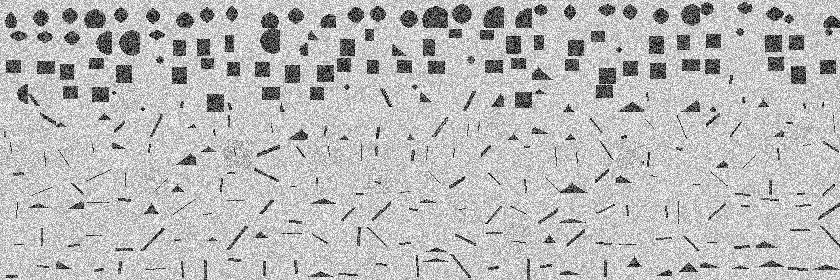

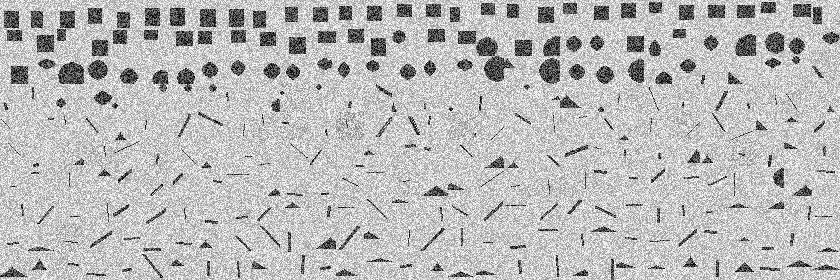

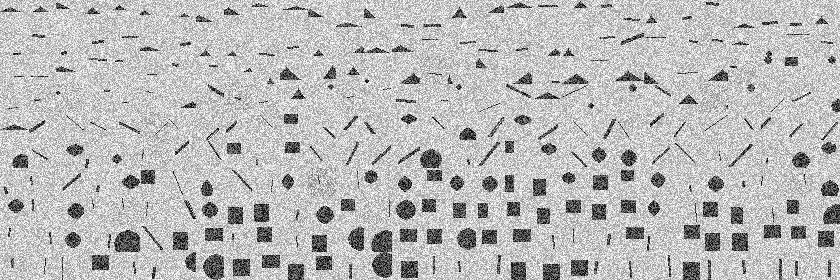

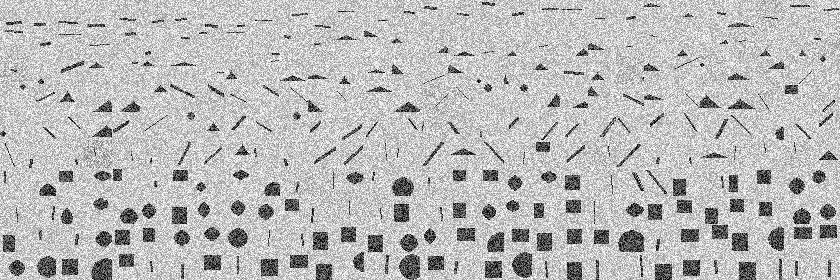

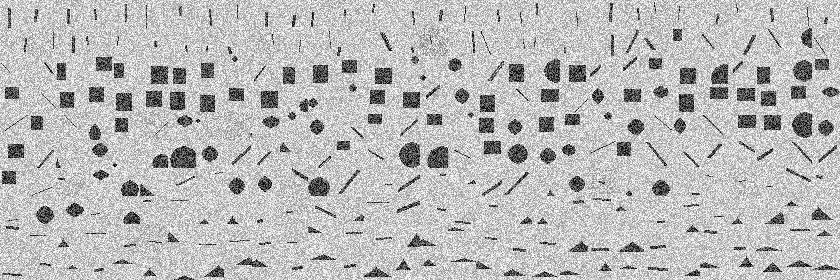

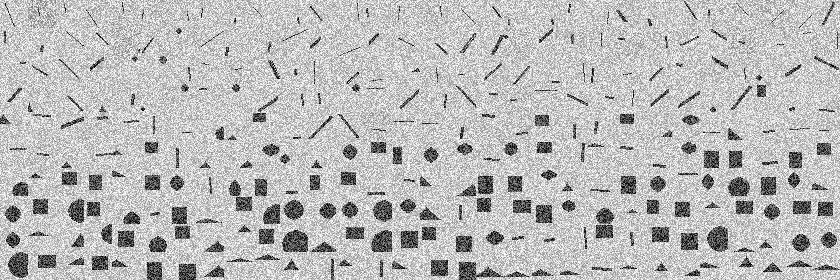

In [87]:
getCompareImages("circle", ordered_circle_dist)
getCompareImages("square", ordered_square_dist)
getCompareImages("triangle", ordered_triangle_dist)
getCompareImages("horizontal", ordered_hor_dist)
getCompareImages("vertical", ordered_ver_dist)
getCompareImages("diagonal", ordered_dia_dist)
